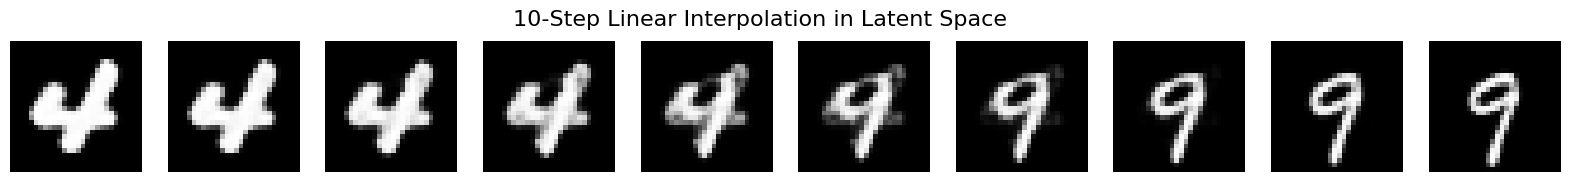

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import sys
from pathlib import Path

# Add project root to Python path
sys.path.append(str(Path.cwd()))


# ---------------------------
# SETUP: Load the MNIST test dataset
# ---------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    # You can add additional transforms if needed (normalization, etc.)
])
mnist_test = datasets.MNIST(root="/datasets/cv_datasets/data", train=False, transform=transform, download=True)
data_loader = DataLoader(mnist_test, batch_size=1, shuffle=True)

# ---------------------------
# LOAD YOUR PRE-TRAINED MODELS
# ---------------------------
# Replace these lines with your model loading code.
# For example, if your models are saved in a file, you might do:
#
#   encoder = torch.load('path_to_encoder.pth')
#   decoder = torch.load('path_to_decoder.pth')
#
# Make sure to set them in evaluation mode:
#   encoder.eval()
#   decoder.eval()
#
# For this example, we assume `encoder` and `decoder` are already defined.
# ---------------------------
# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import sys
sys.path.append("../../")  # Go up 2 directories to reach code/


from mnist.autoencoder import Encoder, Decoder

# Load saved weights
encoder = Encoder(latent_dim=128).to(device)
decoder = Decoder(latent_dim=128).to(device)

encoder.load_state_dict(torch.load("../../artifacts/mnist/autoencoder/encoder_mnist.pth", map_location=device))
decoder.load_state_dict(torch.load("../../artifacts/mnist/autoencoder/decoder_mnist.pth", map_location=device))

encoder.eval()
decoder.eval()


# ---------------------------
# PICK TWO MNIST TEST IMAGES
# ---------------------------
# We'll grab the first two images from the test loader for demonstration.
images = []
labels = []
for i, (img, label) in enumerate(data_loader):
    images.append(img)
    labels.append(label)
    if len(images) == 2:
        break

img1, img2 = images[0].to(device), images[1].to(device)

# ---------------------------
# ENCODE THE IMAGES TO GET LATENT VECTORS
# ---------------------------
with torch.no_grad():
    z1 = encoder(img1)  # Shape: (1, latent_dim)
    z2 = encoder(img2)

# ---------------------------
# PERFORM A 10-STEP LINEAR INTERPOLATION
# ---------------------------
num_steps = 10
alphas = np.linspace(0, 1, num_steps)
interpolated_images = []

with torch.no_grad():
    for alpha in alphas:
        # Compute the interpolated latent vector:
        z_interp = (1 - alpha) * z1 + alpha * z2
        # Decode the latent vector to reconstruct an image
        recon_img = decoder(z_interp)
        # Assuming recon_img is of shape (1, C, H, W), move to CPU and squeeze batch/channel dims
        img_np = recon_img.cpu().squeeze().numpy()
        interpolated_images.append(img_np)

# ---------------------------
# PLOT THE INTERPOLATED IMAGES
# ---------------------------
plt.figure(figsize=(20, 2))
for idx, img in enumerate(interpolated_images):
    ax = plt.subplot(1, num_steps, idx + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
plt.suptitle("10-Step Linear Interpolation in Latent Space", fontsize=16)
plt.show()

In [2]:
import os
print(os.getcwd())


/home/hillahhassan/mini_project_w25/code/dry_questions/question4
